In [36]:
repo_directory = '/Users/iaincarmichael/Dropbox/Research/law/law-net/'

data_dir = '/Users/iaincarmichael/data/courtlistener/'

import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.stats import rankdata, ttest_ind, ttest_rel
import cPickle as pickle

# graph package
import igraph as ig

# our code
sys.path.append(repo_directory + 'code/')
from setup_data_dir import setup_data_dir, make_subnetwork_directory
from pipeline.download_data import download_bulk_resource, download_master_edgelist, download_scdb
from helpful_functions import case_info

sys.path.append(repo_directory + 'vertex_metrics_experiment/code/')
from results import *


from make_tr_edge_df import *


# which network to download data for
network_name = 'scotus' # 'federal', 'ca1', etc


# some sub directories that get used
raw_dir = data_dir + 'raw/'
subnet_dir = data_dir + network_name + '/'
text_dir = subnet_dir + 'textfiles/'
results_dir = subnet_dir + 'results/'

# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
G = ig.Graph.Read_GraphML(subnet_dir + network_name +'_network.graphml')

In [38]:
G.summary()

'IGRAPH DN-- 27885 234312 -- \n+ attr: court (v), id (v), issueArea (v), name (v), num_words (v), year (v)'

# results

In [39]:
# name = 'scotus_test'
name = 'scotus_citerank_words'
name = 'eigen'
name = '1_16_17'

sort_path = results_dir + 'sort/%s/rankloss_sort.p' % name
rankloss_sort = pickle.load(open(sort_path, "rb"))

match_path = results_dir + 'match/%s/rankloss_match.p' % name
rankloss_match = pickle.load(open(match_path, "rb"))

# logreg_path = results_dir + 'logreg/%s/rankloss_LR.p' % name
# rankloss_logreg = pickle.load(open(logreg_path, "rb"))

rankloss = {'sort': rankloss_sort,
             'match': rankloss_match}#,
            #'logreg': rankloss_logreg}

In [53]:
rankloss['sort']['MRS'].columns

Index([u'indegree', u'outdegree', u'degree', u'd_pagerank', u'u_pagerank',
       u'rev_pagerank', u'authorities', u'hubs', u'd_eigen', u'u_eigen',
       u'd_betweenness', u'u_betweenness', u'd_in_closeness',
       u'd_out_closeness', u'd_all_closeness', u'u_closeness', u'recentcite_1',
       u'recentcite_2', u'recentcite_3', u'recentcite_4', u'recentcite_5',
       u'recentcite_6', u'recentcite_7', u'recentcite_8', u'recentcite_9',
       u'recentcite_10', u'recentcite_15', u'recentcite_20', u'recentcite_25',
       u'recentcite_30', u'recentcite_35', u'recentcite_40', u'citerank_1',
       u'citerank_2', u'citerank_5', u'citerank_10', u'citerank_20',
       u'citerank_50', u'polyrank_1', u'polyrank_2', u'polyrank_5',
       u'polyrank_10', u'polyrank_20', u'polyrank_50', u'pagerank_10',
       u'pagerank_20', u'pagerank_30', u'pagerank_40', u'pagerank_50',
       u'pagerank_60', u'pagerank_70', u'pagerank_80', u'pagerank_90', u'age',
       u'similarity', u'num_words'],
      dtyp

NameError: name 'undir_time_agnostic_metrics' is not defined

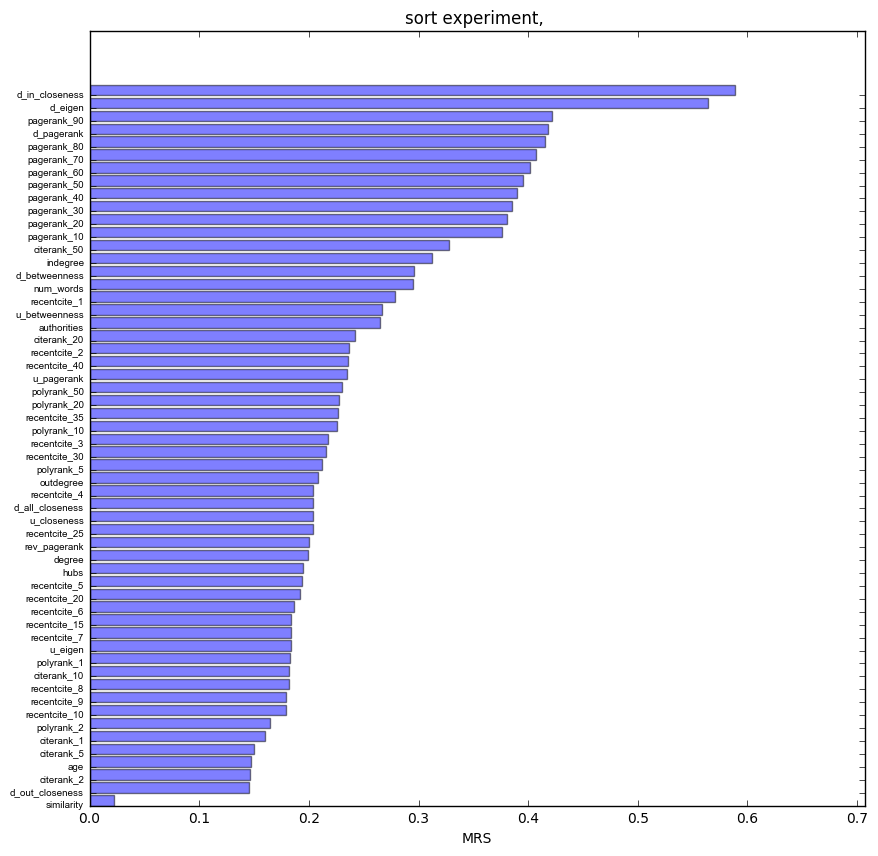

In [51]:
exper = 'sort'
metric = 'MRS'
plt.figure(figsize=[10, 10])
plot_scores(rankloss[exper][metric], exper=exper, metric=metric)

# compare  metrics

In [79]:
exper = 'sort'
metric = 'MRS'

In [80]:
all_metrics = rankloss[exper][metric].columns.tolist()

## directed, time agnostic metrics

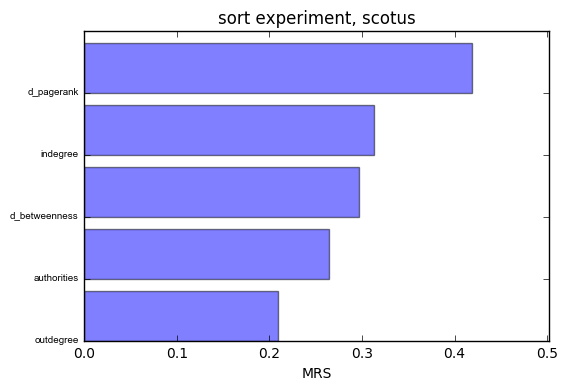

In [56]:
dir_time_agnostic_metrics = ['indegree', 'outdegree',
                             'd_pagerank', 'authorities',
                             'd_betweenness']

plot_scores(rankloss[exper][metric][dir_time_agnostic_metrics], exper=exper, metric=metric, network_name=network_name)

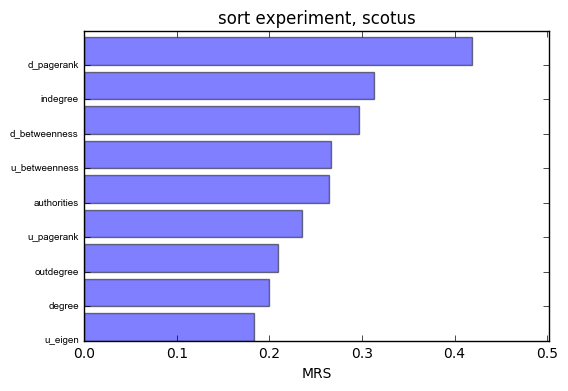

In [58]:
undir_time_agnostic_metrics = copy.copy(dir_time_agnostic_metrics)
undir_time_agnostic_metrics += ['u_pagerank', 'u_eigen', 'u_betweenness', 'degree']

plot_scores(rankloss[exper][metric][undir_time_agnostic_metrics], exper=exper, metric=metric, network_name=network_name)

## case length

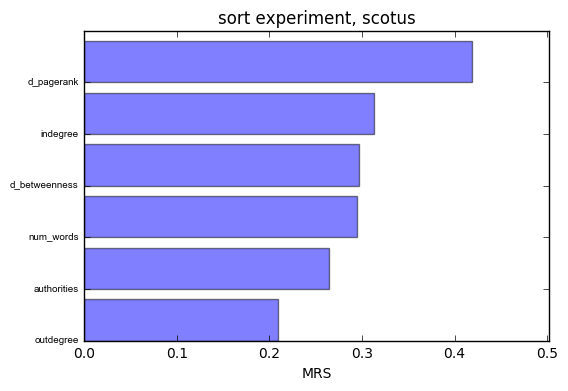

In [63]:
dir_time_agnostic_metrics_text = copy.copy(dir_time_agnostic_metrics)
dir_time_agnostic_metrics_text += ['num_words']
plot_scores(rankloss[exper][metric][dir_time_agnostic_metrics_text], exper=exper, metric=metric, network_name=network_name)

# directed, time_aware metrics

In [47]:
# dir_time_aware_metrics = [m for m in all_metrics if 'recentcite' in m]
# dir_time_aware_metrics += [m for m in all_metrics if 'citerank' in m]
# dir_time_aware_metrics += ['age']

In [48]:
# plot_scores(rankloss[exper][metric][dir_time_aware_metrics], exper=exper, metric=metric)

In [59]:
all_dir_metrics = copy.copy(dir_time_agnostic_metrics)

# all_dir_metrics += ['polyrank_2', 'polyrank_5', 'polyrank_10']
all_dir_metrics += ['citerank_2', 'citerank_5', 'citerank_10', 'citerank_50']
all_dir_metrics += ['recentcite_2' ,'recentcite_5', 'recentcite_10', 'recentcite_20']
all_dir_metrics += ['age']

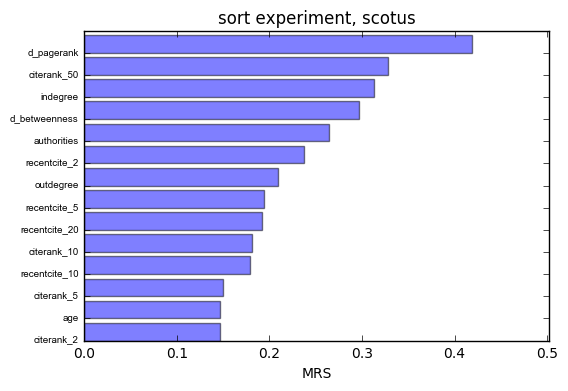

In [61]:
plot_scores(rankloss[exper][metric][all_dir_metrics], exper=exper, metric=metric, network_name=network_name)

# hypothesis tests

In [142]:
# to_compare = ['outdegree', 'hubs']
to_compare = ['recentcite_10', 'citerank_2']
exper = 'sort'
metric = 'MRS'
data = rankloss[exper][metric][to_compare]

print '%s vs. %s' % ( to_compare[0], to_compare[1])
print '%s experiment, %s' % (exper,metric)
print 'two sided t-test for equal means' 
print
print 'dependent paired samples'
print ttest_rel(data[to_compare[0]], data[to_compare[1]])

recentcite_10 vs. citerank_2
sort experiment, MRS
two sided t-test for equal means

dependent paired samples
Ttest_relResult(statistic=14.286058688375009, pvalue=3.6928120708020203e-44)
